In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

%config InlineBackend.figure_format = 'png'

In [4]:
raw_data_df = pd.read_csv('Ecoinovation1.csv', sep=';')

In [6]:
raw_data_df.head()

,sirene,marloc,marnat,mareur,maroth,funloc,fungmt,funeu,co,emp08,...,taille_250_999,taille_999,concurence,productivite,inno_tech,inno_nontech,ecoinovation,SME2006,SME2006_2008,reglementation
0,303195192,1,0,0,0,NaN,NaN,NaN,NaN,71,...,0,0,0,51,0.0,0.0,0.0,0,0,0
1,353783558,1,1,1,1,0.0,0.0,0.0,0.0,15,...,0,0,1,37,1.0,1.0,1.0,0,0,1
2,323838326,1,0,0,0,NaN,NaN,NaN,NaN,16,...,0,0,0,168,0.0,0.0,0.0,0,0,0
3,454048414,1,0,0,1,NaN,NaN,NaN,NaN,23,...,0,0,0,291,0.0,1.0,1.0,0,0,1
4,429635055,1,0,0,0,NaN,NaN,NaN,NaN,12,...,0,0,0,92,0.0,0.0,0.0,0,0,0


In [8]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20114 entries, 0 to 20113
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sirene          20114 non-null  int64  
 1   marloc          20114 non-null  int64  
 2   marnat          20114 non-null  int64  
 3   mareur          20114 non-null  int64  
 4   maroth          20114 non-null  int64  
 5   funloc          7409 non-null   float64
 6   fungmt          7409 non-null   float64
 7   funeu           7409 non-null   float64
 8   co              7427 non-null   float64
 9   emp08           20114 non-null  int64  
 10  caht            20114 non-null  int64  
 11  deprd           7427 non-null   float64
 12  taille_50_1     20114 non-null  int64  
 13  taille_50_99    20114 non-null  int64  
 14  taille_100_249  20114 non-null  int64  
 15  taille_250_999  20114 non-null  int64  
 16  taille_999      20114 non-null  int64  
 17  concurence      20114 non-null 

In [10]:
raw_data_df.fillna(raw_data_df.median(), inplace=True)

In [12]:
raw_data_df.isnull().sum()

sirene            0
marloc            0
marnat            0
mareur            0
maroth            0
funloc            0
fungmt            0
funeu             0
co                0
emp08             0
caht              0
deprd             0
taille_50_1       0
taille_50_99      0
taille_100_249    0
taille_250_999    0
taille_999        0
concurence        0
productivite      0
inno_tech         0
inno_nontech      0
ecoinovation      0
SME2006           0
SME2006_2008      0
reglementation    0
dtype: int64

In [20]:
raw_data_df=raw_data_df.drop('sirene', axis=1)

In [39]:
df_clean = raw_data_df.copy()

In [43]:
# re-checking for missing values
if df_clean.isnull().sum()[df_clean.isnull().sum() > 0].empty:
    print('No missing value in the data')
else:
    print('Missing values still present in the data')

No missing value in the data


In [45]:
def treatoutliers(df, columns=None, factor=1.5, method='IQR', treament='cap'):
    """
    Removes the rows from self.df whose value does not lies in the specified standard deviation
    :param columns:
    :param in_stddev:
    :return:
    """
#     if not columns:
#         columns = self.mandatory_cols_ + self.optional_cols_ + [self.target_col]
    if not columns:
        columns = df.columns
    
    for column in columns:
        if method == 'STD':
            permissable_std = factor * df[column].std()
            col_mean = df[column].mean()
            floor, ceil = col_mean - permissable_std, col_mean + permissable_std
        elif method == 'IQR':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            floor, ceil = Q1 - factor * IQR, Q3 + factor * IQR
        
        if treament == 'remove':
            df = df[(df[column] >= floor) & (df[column] <= ceil)]
        elif treament == 'cap':
            df[column] = df[column].clip(floor, ceil)
            
    return df

In [47]:

df_clean = treatoutliers(df_clean)

In [49]:
df_scaled = df_clean.copy()

In [53]:
Eco=df_clean.ecoinovation

In [55]:
df_scaled=df_scaled.drop('ecoinovation',axis=1)

In [57]:
df_scaled

,marloc,marnat,mareur,maroth,funloc,fungmt,funeu,co,emp08,caht,...,taille_100_249,taille_250_999,taille_999,concurence,productivite,inno_tech,inno_nontech,SME2006,SME2006_2008,reglementation
0,1,0,0,0,0.0,0.0,0.0,0.0,71.0,3642,...,0,0,0,0,51.0,0.0,0.0,0,0,0
1,1,1,1,0,0.0,0.0,0.0,0.0,15.0,556,...,0,0,0,0,37.0,1.0,1.0,0,0,0
2,1,0,0,0,0.0,0.0,0.0,0.0,16.0,2680,...,0,0,0,0,168.0,0.0,0.0,0,0,0
3,1,0,0,0,0.0,0.0,0.0,0.0,23.0,6691,...,0,0,0,0,291.0,0.0,1.0,0,0,0
4,1,0,0,0,0.0,0.0,0.0,0.0,12.0,1103,...,0,0,0,0,92.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20109,1,1,0,0,0.0,0.0,0.0,0.0,217.5,24102,...,0,0,0,0,44.0,1.0,0.0,0,0,0
20110,1,1,0,0,0.0,0.0,0.0,0.0,217.5,53857,...,0,0,0,0,53.0,0.0,0.0,0,0,0
20111,1,0,0,0,0.0,0.0,0.0,0.0,17.0,413,...,0,0,0,0,24.0,1.0,1.0,0,0,0
20112,1,0,0,0,0.0,0.0,0.0,0.0,21.0,2613,...,0,0,0,0,124.0,0.0,0.0,0,0,0


In [59]:
# importing standardscaler
from sklearn.preprocessing import StandardScaler

# initiating standardscaler model
scaler = StandardScaler()

# fitting the model on the copy of the cleaned data
scaler.fit(df_scaled)

# normalizing the data and adding column names
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns = df_scaled.columns)

In [61]:
df_scaled

,marloc,marnat,mareur,maroth,funloc,fungmt,funeu,co,emp08,caht,...,taille_100_249,taille_250_999,taille_999,concurence,productivite,inno_tech,inno_nontech,SME2006,SME2006_2008,reglementation
0,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,0.008729,-0.611709,...,0.0,0.0,0.0,0.0,-1.047736,-0.74418,-0.849845,0.0,0.0,0.0
1,0.0,0.846120,1.393996,0.0,0.0,0.0,0.0,0.0,-0.706448,-0.770368,...,0.0,0.0,0.0,0.0,-1.141741,1.34376,1.176685,0.0,0.0,0.0
2,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,-0.693677,-0.661168,...,0.0,0.0,0.0,0.0,-0.262124,-0.74418,-0.849845,0.0,0.0,0.0
3,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,-0.604280,-0.454952,...,0.0,0.0,0.0,0.0,0.563777,-0.74418,1.176685,0.0,0.0,0.0
4,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,-0.744761,-0.742245,...,0.0,0.0,0.0,0.0,-0.772436,-0.74418,-0.849845,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20109,0.0,0.846120,-0.717362,0.0,0.0,0.0,0.0,0.0,1.879684,0.440192,...,0.0,0.0,0.0,0.0,-1.094739,1.34376,-0.849845,0.0,0.0,0.0
20110,0.0,0.846120,-0.717362,0.0,0.0,0.0,0.0,0.0,1.879684,1.969972,...,0.0,0.0,0.0,0.0,-1.034307,-0.74418,-0.849845,0.0,0.0,0.0
20111,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,-0.680906,-0.777720,...,0.0,0.0,0.0,0.0,-1.229031,1.34376,1.176685,0.0,0.0,0.0
20112,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,-0.629822,-0.664612,...,0.0,0.0,0.0,0.0,-0.557568,-0.74418,-0.849845,0.0,0.0,0.0


In [63]:
raw_data_df = pd.concat([Eco, df_scaled], axis=1)

In [65]:
raw_data_df

,ecoinovation,marloc,marnat,mareur,maroth,funloc,fungmt,funeu,co,emp08,...,taille_100_249,taille_250_999,taille_999,concurence,productivite,inno_tech,inno_nontech,SME2006,SME2006_2008,reglementation
0,0.0,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,0.008729,...,0.0,0.0,0.0,0.0,-1.047736,-0.74418,-0.849845,0.0,0.0,0.0
1,1.0,0.0,0.846120,1.393996,0.0,0.0,0.0,0.0,0.0,-0.706448,...,0.0,0.0,0.0,0.0,-1.141741,1.34376,1.176685,0.0,0.0,0.0
2,0.0,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,-0.693677,...,0.0,0.0,0.0,0.0,-0.262124,-0.74418,-0.849845,0.0,0.0,0.0
3,1.0,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,-0.604280,...,0.0,0.0,0.0,0.0,0.563777,-0.74418,1.176685,0.0,0.0,0.0
4,0.0,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,-0.744761,...,0.0,0.0,0.0,0.0,-0.772436,-0.74418,-0.849845,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20109,1.0,0.0,0.846120,-0.717362,0.0,0.0,0.0,0.0,0.0,1.879684,...,0.0,0.0,0.0,0.0,-1.094739,1.34376,-0.849845,0.0,0.0,0.0
20110,0.0,0.0,0.846120,-0.717362,0.0,0.0,0.0,0.0,0.0,1.879684,...,0.0,0.0,0.0,0.0,-1.034307,-0.74418,-0.849845,0.0,0.0,0.0
20111,1.0,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,-0.680906,...,0.0,0.0,0.0,0.0,-1.229031,1.34376,1.176685,0.0,0.0,0.0
20112,0.0,0.0,-1.181866,-0.717362,0.0,0.0,0.0,0.0,0.0,-0.629822,...,0.0,0.0,0.0,0.0,-0.557568,-0.74418,-0.849845,0.0,0.0,0.0


In [ ]:
# MODELING

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [83]:
from sklearn.model_selection import train_test_split

x = raw_data_df.copy().drop(['ecoinovation'], axis=1)
y = raw_data_df.copy()['ecoinovation']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, shuffle=False
)

In [85]:
y

0        0.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
20109    1.0
20110    0.0
20111    1.0
20112    0.0
20113    1.0
Name: ecoinovation, Length: 20114, dtype: float64

In [87]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [ ]:
# 1-) XGB Classifier

In [89]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

In [91]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

Cross Validation Score :  92.18%
ROC_AUC Score :  90.06%


              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89      2083
         1.0       0.85      0.97      0.90      1940

    accuracy                           0.90      4023
   macro avg       0.90      0.90      0.90      4023
weighted avg       0.91      0.90      0.90      4023



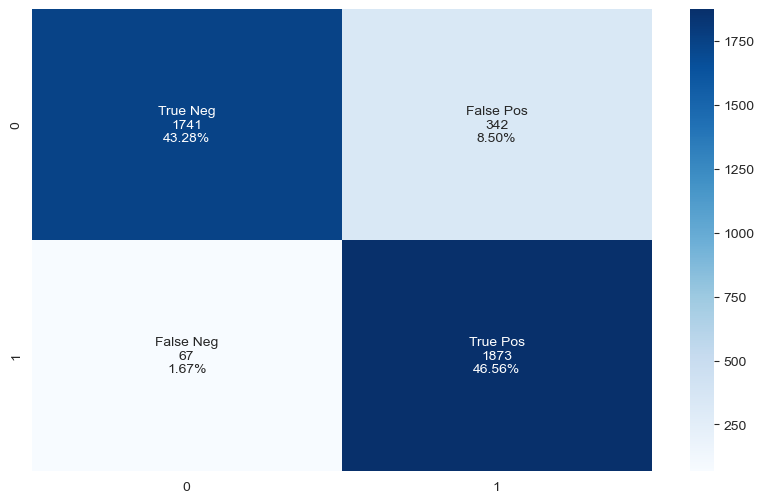

In [93]:
model_evaluation(classifier_xgb,x_test,y_test)

In [ ]:
# 2) LGBM Classifier

In [97]:
pip install lightgbm

  Using cached lightgbm-4.4.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.4.0-py3-none-win_amd64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [99]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000, force_col_wise='true',verbose=-1)

In [101]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)

Cross Validation Score :  92.17%
ROC_AUC Score :  89.99%


              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89      2083
         1.0       0.85      0.96      0.90      1940

    accuracy                           0.90      4023
   macro avg       0.90      0.90      0.90      4023
weighted avg       0.91      0.90      0.90      4023



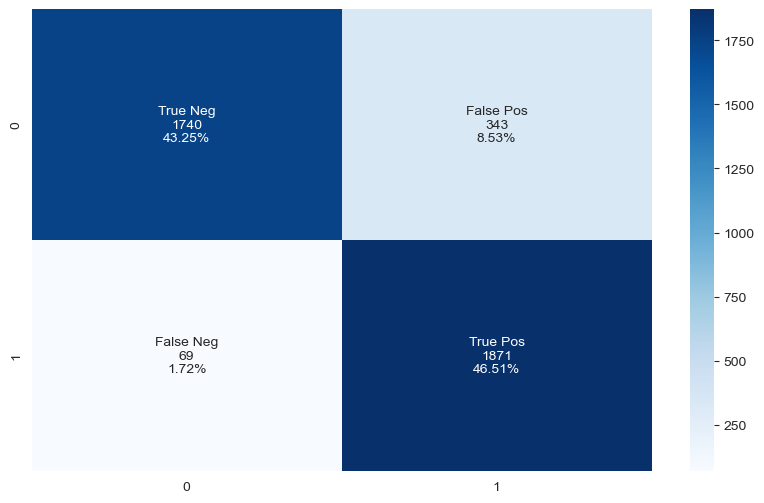

In [103]:
model_evaluation(classifier_lgbm,x_test,y_test)

In [ ]:
# Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

In [107]:
model(classifier_rf,x_train,y_train,x_test,y_test)

Cross Validation Score :  91.88%
ROC_AUC Score :  88.19%


              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88      2083
         1.0       0.85      0.91      0.88      1940

    accuracy                           0.88      4023
   macro avg       0.88      0.88      0.88      4023
weighted avg       0.88      0.88      0.88      4023



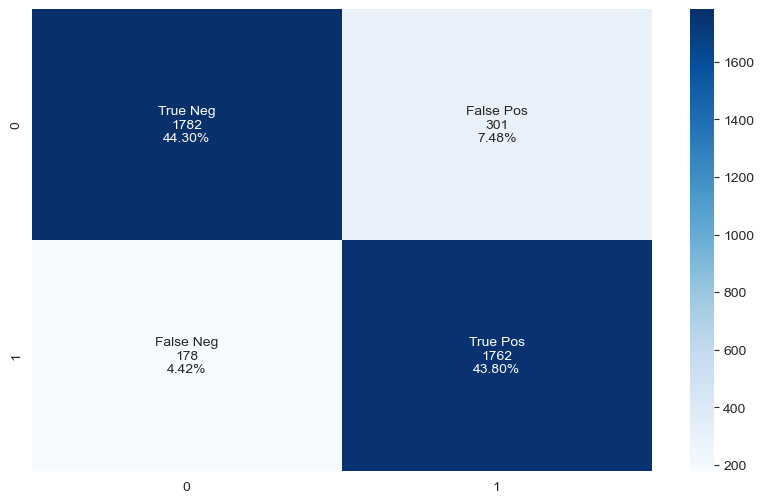

In [109]:
model_evaluation(classifier_rf,x_test,y_test)

In [ ]:
# Decision Tree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

In [113]:
model(classifier_dt,x_train,y_train,x_test,y_test)

Cross Validation Score :  92.08%
ROC_AUC Score :  87.83%


              precision    recall  f1-score   support

         0.0       0.91      0.84      0.88      2083
         1.0       0.84      0.92      0.88      1940

    accuracy                           0.88      4023
   macro avg       0.88      0.88      0.88      4023
weighted avg       0.88      0.88      0.88      4023



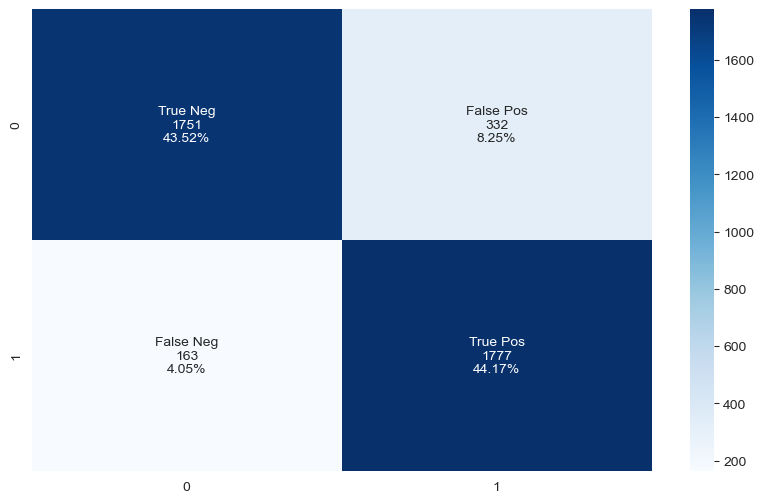

In [115]:
model_evaluation(classifier_dt,x_test,y_test)

In [ ]:
# 5) Stack of XGBClassifier, LightGBMClassifier, Random Forest Classifer & Decision Tree Classifier

In [117]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('classifier_lgbm',classifier_lgbm),
                                         ('classifier_rf',classifier_rf),
                                         ('classifier_dt',classifier_dt)],
                           final_estimator = classifier_lgbm)

In [119]:
model(stack,x_train,y_train,x_test,y_test)

Cross Validation Score :  91.50%
ROC_AUC Score :  90.04%


              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      2083
         1.0       0.84      0.97      0.90      1940

    accuracy                           0.90      4023
   macro avg       0.90      0.90      0.90      4023
weighted avg       0.91      0.90      0.90      4023



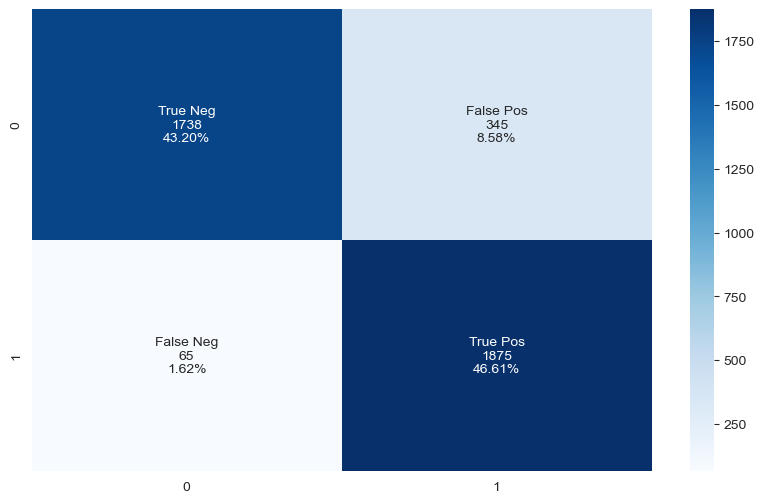

In [121]:
model_evaluation(stack,x_test,y_test)